# Задачи исследования #
1. Для **температуры** повторите базовое исследование, приведённое в лекции №2 (см. выложенный в канале **#data_mining_bachelors** ноутбук).
2. Найдите, показания каких датчиков сильнее всего коррелируют с температурой.
3. Определите наименее точный датчик среди всех.
4. Определите признак, плотность распределения которого наиболее близка нормальной. Покажите это численно с помощью одного из статистических тестов. Определите параметры этого распределения и постройте на одном графике "идеальное" распределение и распределение признаков (все оси и график должны быть подписаны).
5. Укажите один из описывающих состояние воздуха признаков, в котором прослеживается наибольшая доля статистических выбросов.
6. Выявите характер зависимости между температурой и влажностью (линейная, квадратичная, иная, отсутствует).
7. Определите, обладают ли температура и влажность сезонностью. Прослеживается ли в них тренд?

Дополнительные задачи:

1. Выявите наиболее опасный (в среднем) для здоровья день недели.
2. Определите пять самых безопасных для здоровья дней за время наблюдения, выдвиньте разумные гипотезы причин низкой опасности (опираясь на данные).

### Описание полей ###
|Ном|Поля                                                                                                   | 
|---|-----------------------------------------------------------------------------------------------------------|
|1.  |Date (DD/MM/YYYY)                                                                                          |
|2.  |Time (HH.MM.SS)                                                                                            |
|3.  |True hourly averaged concentration CO in mg/m^3 (reference analyzer)                                       |
|4.  |PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)                                |
|5.  |True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)  |
|6.  |True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)                              |
|7.  |PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)                                |
|8.  |True hourly averaged NOx concentration in ppb (reference analyzer)                                         |
|9.  |PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)                          |
|10. |True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)                                  |
|11. |PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)                          |
|12. |PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)                             | 
|13. |Temperature in °C                                                                                          | 
|14. |Relative Humidity                                                                                          |
|15. |Temperature in °C                                                                                          | 




### Скачаем файл? ###

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
import pandas as pd

sns.set(style="ticks", color_codes=True)

### Загрузка файла в датафрейм . 

In [2]:
AirQuality = pd.read_csv("AirQualityUCI.csv",sep=';',na_filter=True)

# Нормализация данных #

In [3]:
AirQuality = AirQuality.loc[:, ~AirQuality.columns.str.contains('^Unnamed')];

### Сколько пропущенных значений?

In [4]:
AirQuality.shape[0]-AirQuality.count()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

### А типы? ###

In [5]:
AirQuality.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [6]:
AirQuality['Date']=pd.to_datetime(AirQuality.Date, format='%d/%m/%Y') 

In [7]:
AirQuality.set_index('Date',inplace=True)
AirQuality['MONTH']=AirQuality.index.month  
AirQuality.reset_index(inplace=True)
AirQuality['Time'] = AirQuality['Time'].str.split('.').str[0]
AirQuality.Time = AirQuality.Time.fillna('0')
AirQuality.Time = AirQuality.Time.astype(np.int)

In [8]:
AirQuality = AirQuality.loc[:, ~AirQuality.columns.str.contains('^Unnamed')];
AirQuality['CO(GT)'] = AirQuality['C6H6(GT)'].str.replace(',','.').astype(float)
AirQuality['C6H6(GT)'] = AirQuality['C6H6(GT)'].str.replace(',','.').astype(float)

In [9]:
AirQuality['RH'] = AirQuality['RH'].str.replace(',','.').astype(float)
AirQuality['AH'] = AirQuality['AH'].str.replace(',','.').astype(float)
AirQuality['T'] = AirQuality['T'].str.replace(',','.').astype(float)

In [10]:
AirQuality[ AirQuality==-200] = np.nan 
AirQuality['CO(GT)']=AirQuality['CO(GT)'].fillna(AirQuality['CO(GT)'].mean())
AirQuality['NOx(GT)']=AirQuality['NOx(GT)'].fillna(AirQuality['NOx(GT)'].mean())
AirQuality['NO2(GT)']=AirQuality['NO2(GT)'].fillna(AirQuality['NO2(GT)'].mean())
AirQuality['T']=AirQuality['T'].fillna(AirQuality['T'].mean())
AirQuality['RH']=AirQuality['RH'].fillna(AirQuality['RH'].mean())
AirQuality['AH']=AirQuality['AH'].fillna(AirQuality['AH'].mean())
AirQuality['PT08.S1(CO)']=AirQuality['PT08.S1(CO)'].fillna(AirQuality['PT08.S1(CO)'].mean())
AirQuality['C6H6(GT)']=AirQuality['C6H6(GT)'].fillna(AirQuality['C6H6(GT)'].mean())
AirQuality['PT08.S3(NOx)']=AirQuality['PT08.S3(NOx)'].fillna(AirQuality['PT08.S3(NOx)'].mean())
AirQuality['PT08.S4(NO2)']=AirQuality['PT08.S4(NO2)'].fillna(AirQuality['PT08.S4(NO2)'].mean())
AirQuality['PT08.S5(O3)']=AirQuality['PT08.S5(O3)'].fillna(AirQuality['PT08.S5(O3)'].mean())
AirQuality['PT08.S2(NMHC)']=AirQuality['PT08.S2(NMHC)'].fillna(AirQuality['PT08.S2(NMHC)'].mean())

### Удаляем  NMHC(GT) из датасета из - за того, что он практически не содержит ценной информации

In [11]:
AirQuality.drop('NMHC(GT)',axis=1 ,inplace=True)

### А теперь?

In [12]:
AirQuality.shape[0]-AirQuality.count()

Date             114
Time               0
CO(GT)             0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
MONTH            114
dtype: int64

### Первичный анализ 

In [13]:
AirQuality.describe()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,MONTH
count,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9357.000000
mean,11.360152,10.083105,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,6.310356
std,6.994707,7.258562,211.506999,7.258562,259.981136,192.258871,250.224117,43.655793,337.318719,388.254107,8.605371,16.872320,0.393446,3.438160
min,0.000000,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,1.000000
25%,5.000000,4.600000,943.000000,4.600000,744.000000,113.000000,667.000000,86.000000,1246.000000,744.500000,12.100000,36.700000,0.750100,3.000000
50%,11.000000,8.700000,1078.000000,8.700000,927.000000,232.000000,821.000000,113.091251,1456.264598,990.000000,18.317829,49.234201,1.020300,6.000000
75%,17.000000,13.500000,1218.000000,13.500000,1102.000000,281.500000,957.000000,132.000000,1658.000000,1250.000000,24.000000,61.700000,1.291500,9.000000
max,23.000000,63.700000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,12.000000


In [14]:
AirQualitiesDist = AirQuality.copy()
AirQualitiesDiffDist = AirQuality.copy()

In [15]:
columns = ['PT08.S1(CO)','PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
realValue = ['CO(GT)', 'C6H6(GT)','NOx(GT)','NO2(GT)']

In [16]:
columnsTWCC = ['CO_Diff', 'NOx_Diff', 'NO2_Diff']

In [17]:
AirQualitiesDist[columns].apply(lambda x:x.mean() - x,  axis=1);

In [18]:
AirQualitiesDiffDist['CO_Diff'] =   AirQualitiesDiffDist ['CO(GT)'] - AirQualitiesDiffDist['PT08.S1(CO)']
AirQualitiesDiffDist['NOx_Diff'] = AirQualitiesDiffDist ['NOx(GT)'] -AirQualitiesDiffDist['PT08.S3(NOx)'] 
AirQualitiesDiffDist['NO2_Diff'] =   AirQualitiesDiffDist ['NO2(GT)'] - AirQualitiesDiffDist['PT08.S4(NO2)']

In [19]:
AirQualitiesDiffDist[columnsTWCC].describe()

,CO_Diff,NOx_Diff,NO2_Diff
count,9471.000000,9471.000000,9471.000000
mean,-1089.750061,-588.596870,-1343.173347
std,205.120033,392.136436,333.986812
min,-2000.800000,-2583.000000,-2621.000000
25%,-1205.650000,-813.000000,-1549.000000
50%,-1068.300000,-607.103265,-1349.000000
75%,-937.550000,-379.051633,-1130.000000
max,-646.700000,1145.000000,-445.908749


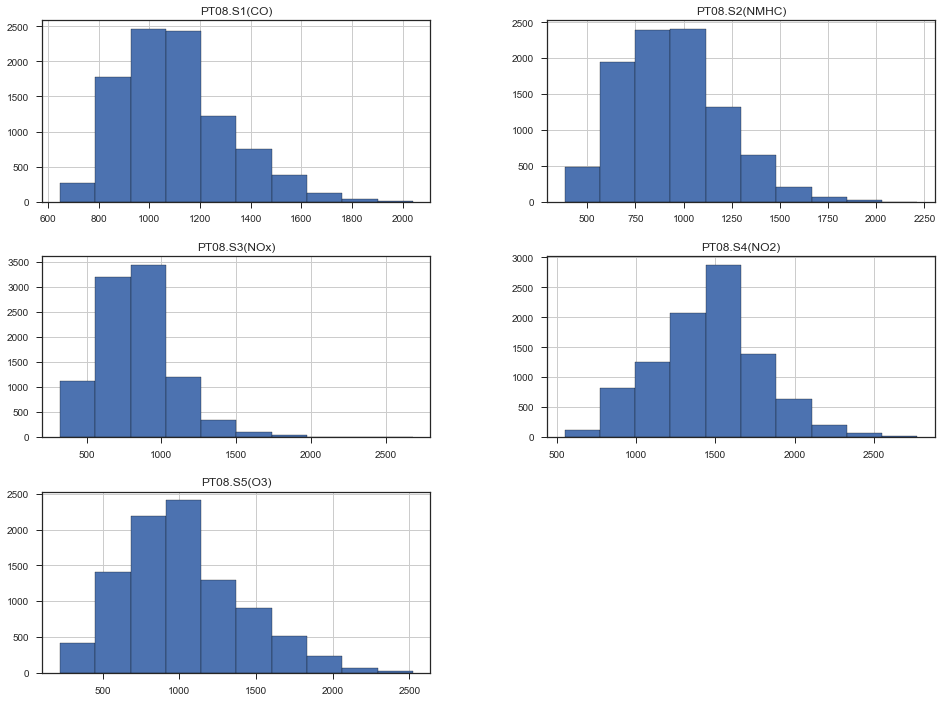

In [67]:
AirQualitiesDist[columns].hist(figsize=(16,12), ec = 'black');

In [21]:
AirQualitiesDist[columns].std()

PT08.S1(CO)      211.506999
PT08.S2(NMHC)    259.981136
PT08.S3(NOx)     250.224117
PT08.S4(NO2)     337.318719
PT08.S5(O3)      388.254107
dtype: float64

##### Исходя из гистограммы, приведенной выше, можем заметить, что датчик PT08.S5(03) имеет большой разброс относительно своего среднего значения, а C6H6(GT) имеет самый низкий разброс, также относительно своего значения , следовательно можем выдвинуть гипотезу о низкой точности данного датчика

### Здесь мы можем видеть, что плотность признака T наиболее близка к нормальной 

# Выявляем корреляцию сенсоров c истинными значениями (GT)

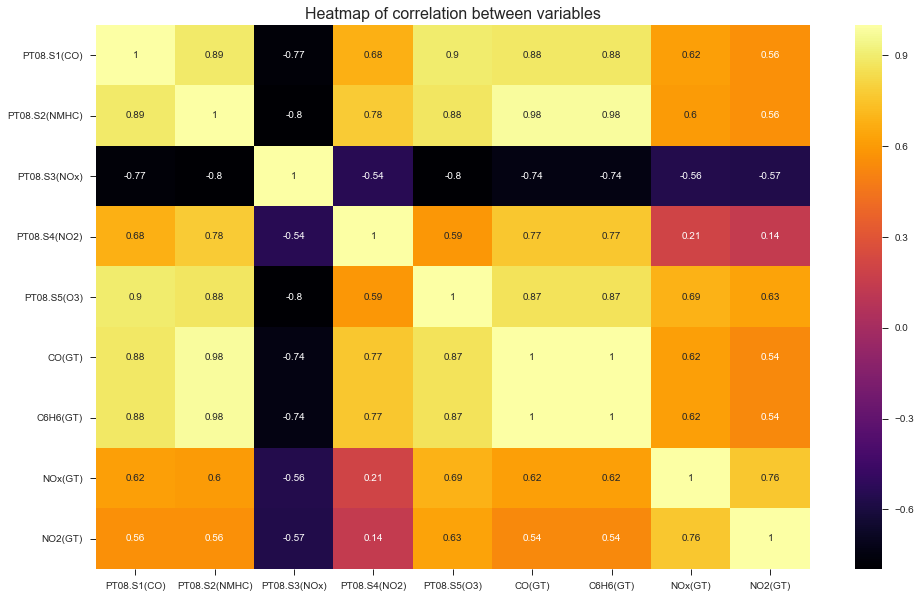

In [38]:
plt.figure(figsize = (16,10))
sns.heatmap(AirQuality[columns + realValue].corr(),annot=True,cmap='inferno')
plt.title('Heatmap of correlation between variables',fontsize=16)
plt.show()

In [46]:
def get_corrs(df):
    col_correlations = df.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()

corrs_dict = get_corrs(AirQuality[columns + realValue])

In [47]:
import operator
dict(sorted(corrs_dict.iteritems(), key=operator.itemgetter(1), reverse=True)[:35])

{('C6H6(GT)', 'C6H6(GT)'): 0.0,
 ('C6H6(GT)', 'CO(GT)'): 1.0,
 ('C6H6(GT)', 'PT08.S1(CO)'): 0.8837950766080607,
 ('C6H6(GT)', 'PT08.S2(NMHC)'): 0.9819503158012536,
 ('C6H6(GT)', 'PT08.S4(NO2)'): 0.7657313582719592,
 ('C6H6(GT)', 'PT08.S5(O3)'): 0.8656885045054669,
 ('CO(GT)', 'PT08.S1(CO)'): 0.8837950766080607,
 ('CO(GT)', 'PT08.S2(NMHC)'): 0.9819503158012536,
 ('CO(GT)', 'PT08.S4(NO2)'): 0.7657313582719592,
 ('CO(GT)', 'PT08.S5(O3)'): 0.8656885045054669,
 ('NO2(GT)', 'C6H6(GT)'): 0.535918873575239,
 ('NO2(GT)', 'CO(GT)'): 0.535918873575239,
 ('NO2(GT)', 'NOx(GT)'): 0.7630737251299422,
 ('NO2(GT)', 'PT08.S1(CO)'): 0.5628430634743379,
 ('NO2(GT)', 'PT08.S2(NMHC)'): 0.5611798708409119,
 ('NO2(GT)', 'PT08.S4(NO2)'): 0.1406552883328942,
 ('NO2(GT)', 'PT08.S5(O3)'): 0.6294425899245484,
 ('NOx(GT)', 'C6H6(GT)'): 0.6168012293348072,
 ('NOx(GT)', 'CO(GT)'): 0.6168012293348072,
 ('NOx(GT)', 'PT08.S1(CO)'): 0.6159414615460244,
 ('NOx(GT)', 'PT08.S2(NMHC)'): 0.6017726566500333,
 ('NOx(GT)', 'PT08

### Выявляем влияние  полей на влажность 

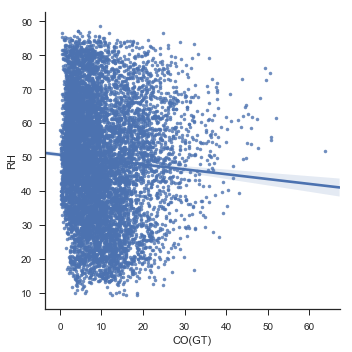

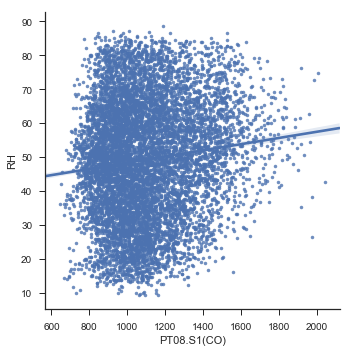

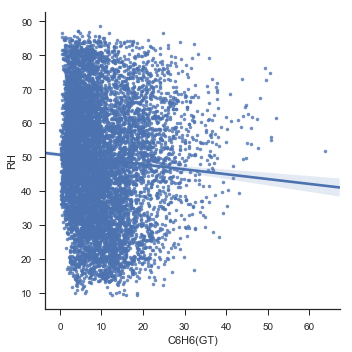

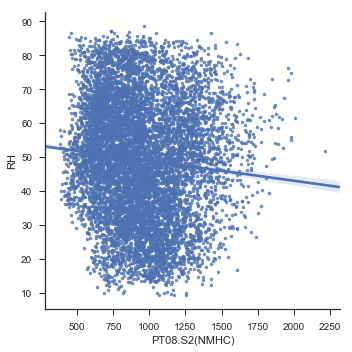

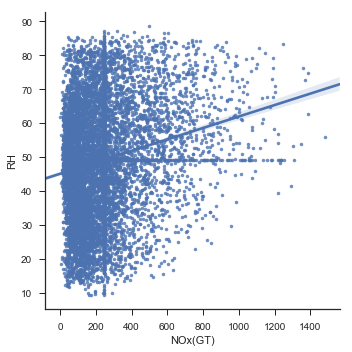

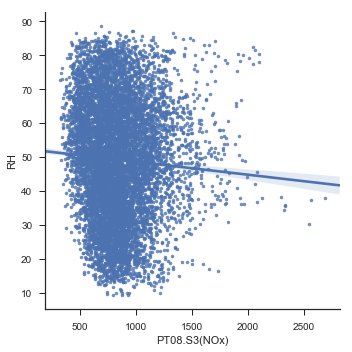

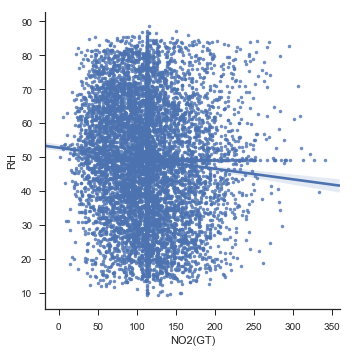

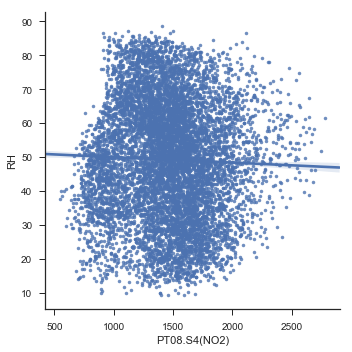

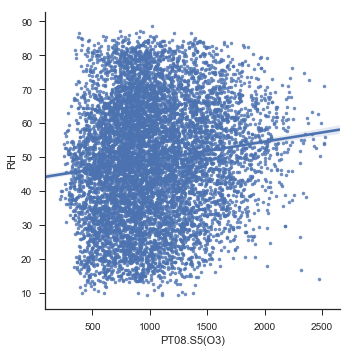

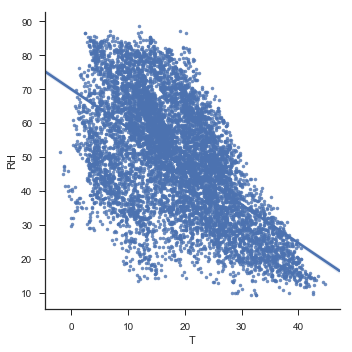

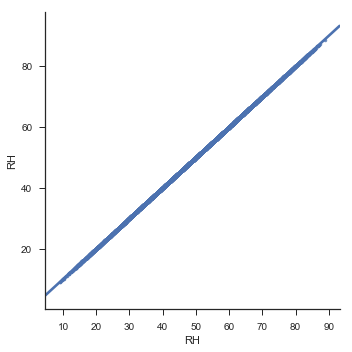

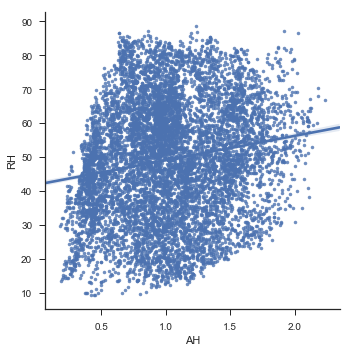

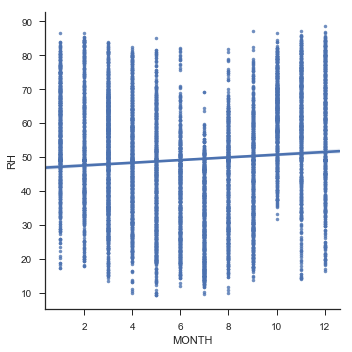

In [36]:
col_=AirQuality.columns.tolist()[2:]
for i in AirQuality.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=AirQuality,markers='.')

#### Отсюда делаем вывод о отрицательной корреляции температуры и влажности  и существования обратной квадратичной взаимосвязи 


### Ищем самый опасный и безопасный день

In [32]:
import datetime as dt
AirQuality = AirQuality.set_index(pd.DatetimeIndex(AirQuality['Date']))
by_weekday = AirQuality.groupby(AirQuality.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

### Ищем самые опасные дни недели

In [33]:
by_weekday['CO(GT)'].nlargest(7)

Tues     11.626785
Fri      11.604819
Thurs    11.451501
Wed      11.325515
Mon       9.958696
Sat       8.525915
Sun       6.131878
Name: CO(GT), dtype: float64

### Четверг, пятница самые опасные дни недели по количеству выбросов СО

In [35]:
by_weekday['CO(GT)'].nsmallest(3)

Sun    6.131878
Sat    8.525915
Mon    9.958696
Name: CO(GT), dtype: float64

### А в воскресение все сидят дома🏘 

### Анализ временных рядов

In [61]:
S1 = AirQuality['PT08.S1(CO)']
S2 = AirQuality['PT08.S2(NMHC)']
S3 = AirQuality['PT08.S3(NOx)']
S4 = AirQuality['PT08.S4(NO2)']
S5 = AirQuality['PT08.S5(O3)']

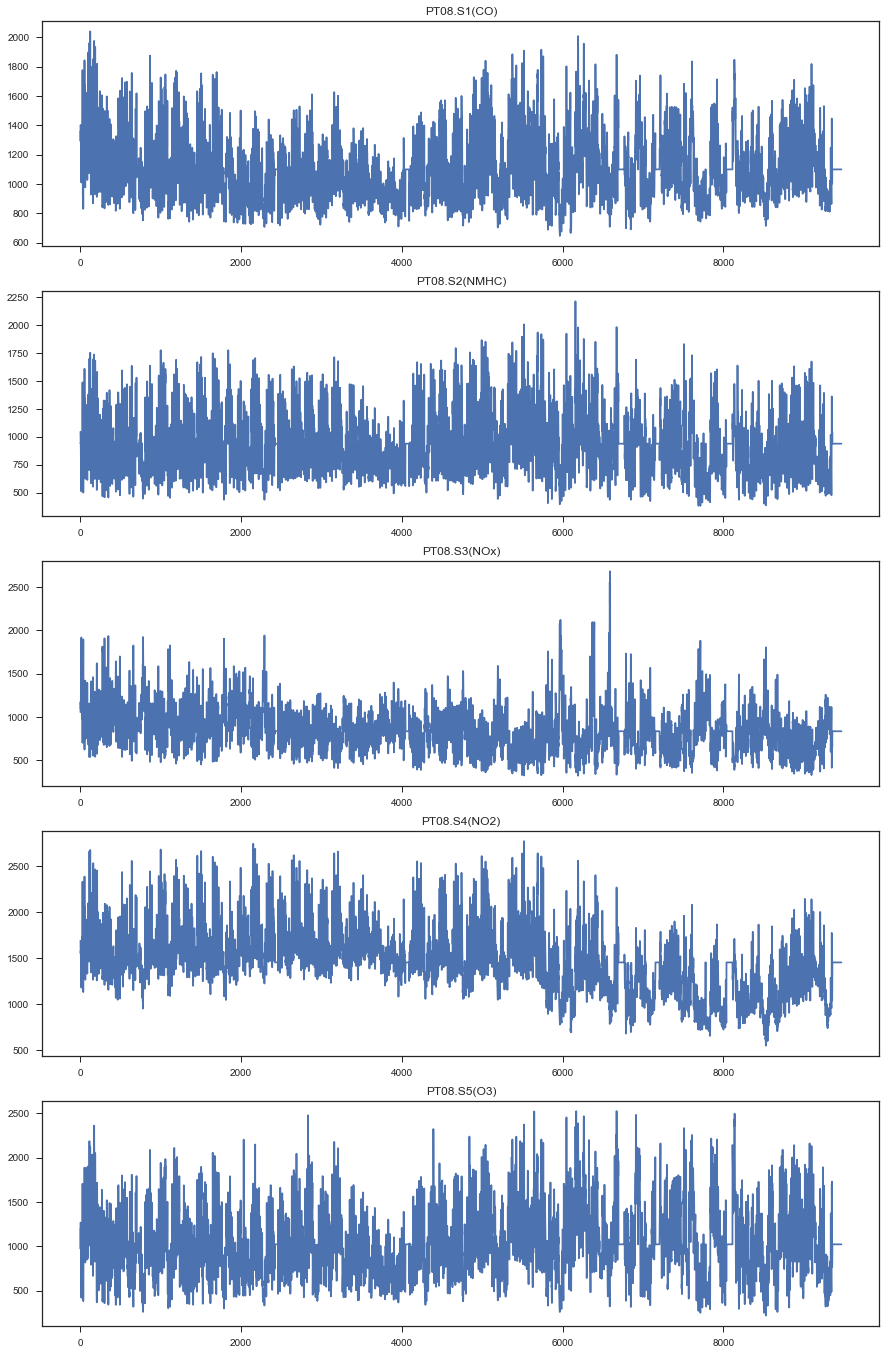

In [62]:
fig, axes = plt.subplots(5,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('PT08.S1(CO)')
axes[1].plot(S2)
axes[1].set_title ('PT08.S2(NMHC)')
axes[2].plot(S3)
axes[2].set_title ('PT08.S3(NOx)')
axes[3].plot(S4)
axes[3].set_title ('PT08.S4(NO2)')
axes[4].plot(S5)
axes[4].set_title ('PT08.S5(O3)');

### По видимому PT08.S1(CO) обладает сезонностью 

In [63]:
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 15, 8

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd =timeseries.rolling(12).std()


    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

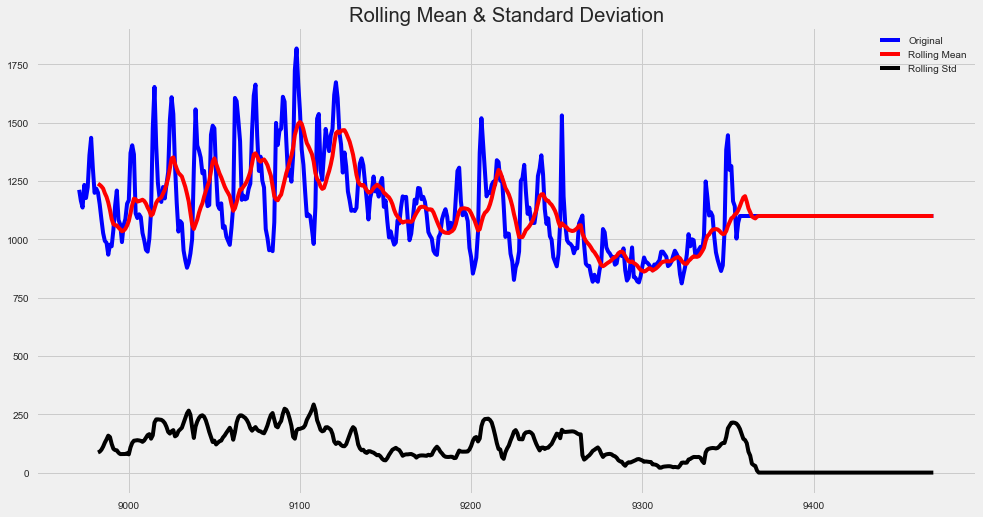

Test Statistic                  -2.222762
p-value                          0.198088
#Lags Used                      18.000000
Number of Observations Used    481.000000
Critical Value (5%)             -2.867568
Critical Value (1%)             -3.444018
Critical Value (10%)            -2.569980
dtype: float64


In [64]:
test_stationarity(S1.tail(500))

### Как насчет предсказывания всего?😂

In [86]:
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split  

In [87]:
AirQuality_droped = AirQuality.drop('Date',axis = 1)
AirQuality_droped.index = pd.RangeIndex(len(AirQuality_droped.index))
X=AirQuality_droped.drop(AirQuality.loc[:,'RH':'MONTH'].head(0).columns, axis=1)
y=AirQuality_droped.RH.values

In [88]:
scale_data=StandardScaler() 

In [89]:
X_std=scale_data.fit_transform(X)  

In [90]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestRegressor 
rf_reg=RandomForestRegressor()

In [92]:
rf_model=rf_reg.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
rf_model.score(X_test, y_test)

0.8647882464203898